In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Названия столбцов в DataFrame:
Index(['ID', 'Класс', 'Пол', 'Уровень тревожности (1-10)', 'Пропуски занятий',
       'Оценка отношений с учителями (1-5)', 'Возраст', 'Предмет_1',
       'Оценка_1', 'Предмет_2', 'Оценка_2', 'Предмет_3', 'Оценка_3',
       'Предмет_4', 'Оценка_4', 'Предмет_5', 'Оценка_5', 'Предмет_6',
       'Оценка_6', 'Предмет_7', 'Оценка_7', 'Предмет_8', 'Оценка_8',
       'Предмет_9', 'Оценка_9', 'Предмет_10', 'Оценка_10', 'Предмет_11',
       'Оценка_11', 'Предмет_12', 'Оценка_12', 'Предмет_13', 'Оценка_13',
       'Предмет_14', 'Оценка_14', 'Предмет_15', 'Оценка_15', 'Предмет_16',
       'Оценка_16', 'Когнитивные способности', 'Результаты анкет',
       'Средний балл', 'Диагностика профиля способностей и достижений',
       'Сильные стороны', 'Слабые стороны'],
      dtype='object')


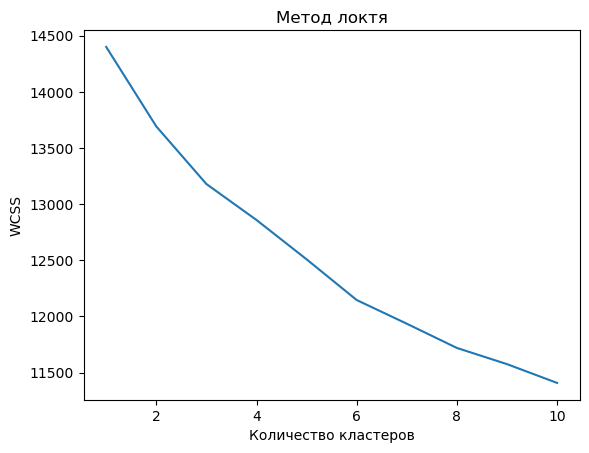

Модель кластеризации и результаты сохранены.


In [1]:
df = pd.read_csv('students_data.csv')

print("Названия столбцов в DataFrame:")
print(df.columns)

df.columns = df.columns.str.strip()

grades = []
for i in range(1, 19):
    grade_col = f'Оценка_{i}'
    if grade_col in df.columns:
        grades.append(df[grade_col].values)

X = np.array(grades).T

X_filled = np.nan_to_num(X, nan=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

joblib.dump(kmeans, 'kmeans_model.pkl')
df.to_csv('clustered_students_data.csv', index=False)

joblib.dump(scaler, 'scaler.pkl')

print("Модель кластеризации и результаты сохранены.")


In [7]:
df = pd.read_csv('clustered_students_data.csv')

features = ['Уровень тревожности (1-10)', 'Пропуски занятий', 'Средний балл', 'Когнитивные способности', 'Результаты анкет']
target = 'Оценка отношений с учителями (1-5)'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

joblib.dump(model, 'teacher_relations_model.pkl')

Mean Squared Error: 2.265137908950617


['teacher_relations_model.pkl']

In [8]:
df = pd.read_csv('clustered_students_data.csv')

model = joblib.load('teacher_relations_model.pkl')
features = ['Уровень тревожности (1-10)', 'Пропуски занятий', 'Средний балл', 'Когнитивные способности', 'Результаты анкет']
predicted_values = model.predict(df[features])
df['Прогнозные значения'] = predicted_values

df.to_csv('clustered_students_data.csv', index=False)

In [7]:
df = pd.read_csv('clustered_students_data.csv')

numerical_columns = []

for i in range(1, 17):
    numerical_columns.append(f'Оценка_{i}')

data = df[numerical_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=numerical_columns)
cluster_df['Cluster'] = cluster_df.index

df.to_csv('clustered_students_with_clusters.csv', index=False)